In [246]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

For when doing GPU work

In [247]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **IPPR CNN Model**

### **Setting up Data**

Import image data from dataset containing 10000 positive images and 10000 negative images with each image resized to 128 x 128 pixels large. The dataset used here takes a random data from the three datasets that were chosen for the project. Kaggle links: 
- https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data
- https://www.kaggle.com/datasets/aniruddhsharma/structural-defects-network-concrete-crack-images
- https://www.kaggle.com/datasets/yatata1/crack-dataset

The data is shuffled and then split into training, testing and validation sets.

In [248]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'Data',
    image_size=(128, 128),
    batch_size=128,
    validation_split=0.2,  # 20% for validation
    subset="training",      # Specify this is the training subset
    seed=7,               # For reproducibility
    shuffle=True            # Shuffle the data
)


val_data = tf.keras.utils.image_dataset_from_directory(
    'Data',
    image_size=(128, 128),
    batch_size=128,
    validation_split=0.2,  # Use 20% of data for validation
    subset="validation",    # Validation subset
    seed=7, 
    shuffle=True
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


The images are converted into grayscale to better the training of the model.

In [249]:
# Function to convert images to grayscale
def convert_to_grayscale(images, labels):
    images = tf.image.rgb_to_grayscale(images)  # Convert RGB to grayscale
    return images, labels

# Apply the grayscale conversion to both datasets
train_data = train_data.map(convert_to_grayscale)
val_data = val_data.map(convert_to_grayscale)

### **Visualisation of the images**

In [ ]:
images, labels = [], []
for img_batch, lbl_batch in val_data:
    images.append(img_batch.numpy())
    labels.append(lbl_batch.numpy())

all_images = np.concatenate(images)
all_labels = np.concatenate(labels)


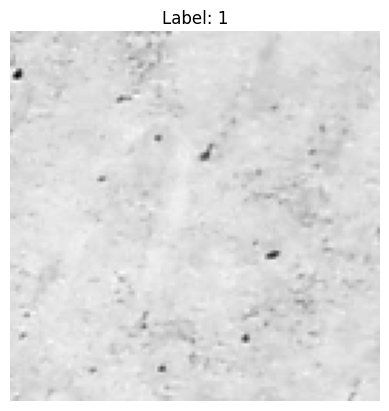

In [ ]:
first_image = all_images[4].squeeze()  
first_label = all_labels[4]

plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

### **Model Building**

In [252]:
model = Sequential()

model.add(tf.keras.Input(shape=(128,128,1)))
model.add(Conv2D(32, 9, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

### **Compiling Model**

In [253]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 120, 120, 32)      2624      
                                                                 
 conv2d_49 (Conv2D)          (None, 114, 114, 16)      25104     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 57, 57, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 55, 55, 16)        2320      
                                                                 
 conv2d_51 (Conv2D)          (None, 53, 53, 16)        2320      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 26, 26, 16)        0         
 ng2D)                                               

                                                                 
 global_max_pooling2d_2 (Gl  (None, 16)                0         
 obalMaxPooling2D)                                               
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 32657 (127.57 KB)
Trainable params: 32657 (127.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [254]:
hist = model.fit(train_data, epochs = 20, validation_data = val_data)

Epoch 1/20


125/125 [==============================] - 12s 82ms/step - loss: 0.3754 - accuracy: 0.8778 - val_loss: 0.2493 - val_accuracy: 0.9080
Epoch 2/20
125/125 [==============================] - 10s 78ms/step - loss: 0.2484 - accuracy: 0.9093 - val_loss: 0.2282 - val_accuracy: 0.9165
Epoch 3/20
125/125 [==============================] - 10s 77ms/step - loss: 0.2313 - accuracy: 0.9149 - val_loss: 0.2108 - val_accuracy: 0.9200
Epoch 4/20
125/125 [==============================] - 10s 77ms/step - loss: 0.2170 - accuracy: 0.9169 - val_loss: 0.2113 - val_accuracy: 0.9133
Epoch 5/20
125/125 [==============================] - 10s 77ms/step - loss: 0.2088 - accuracy: 0.9184 - val_loss: 0.1969 - val_accuracy: 0.9172
Epoch 6/20
125/125 [==============================] - 10s 77ms/step - loss: 0.2009 - accuracy: 0.9181 - val_loss: 0.1929 - val_accuracy: 0.9247
Epoch 7/20
125/125 [==============================] - 10s 79ms/step - loss: 0.1940 - accuracy: 0.9210 - val_loss: 0.1738 - val_accuracy: 0.9255
Epo

### **Plotting and Presenting Results**

Plotting training and validation loss

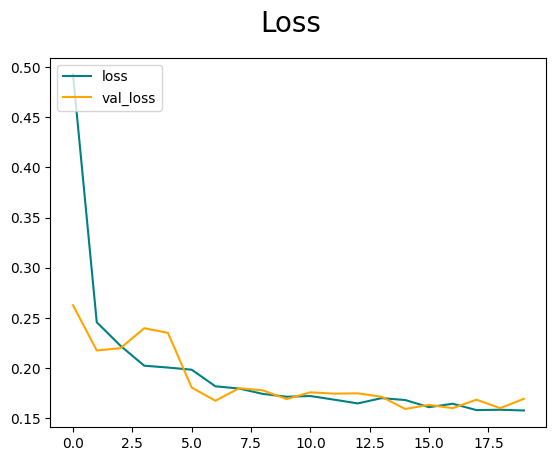

In [128]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

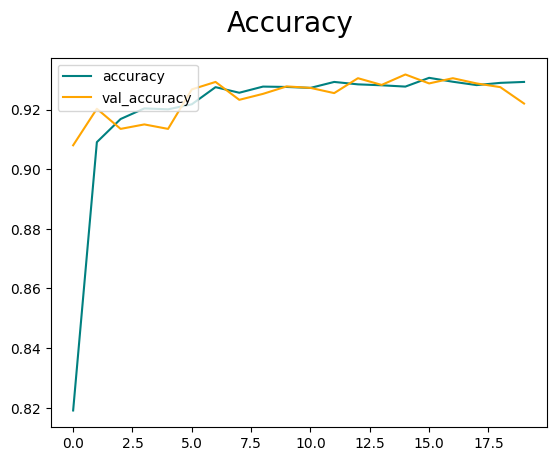

In [129]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


pred = model.predict(all_images)
pred = np.around(pred)

conf_matrix= confusion_matrix(all_labels, pred)

report = classification_report(all_labels, pred, output_dict=True)

precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1_score)

125/125 [==============================] - 1s 7ms/step
Confusion Matrix:
 [[1889   93]
 [ 180 1838]]
Precision (weighted): 0.9325947042216999
Recall (weighted): 0.93175
F1 Score (weighted): 0.9317310703446228
